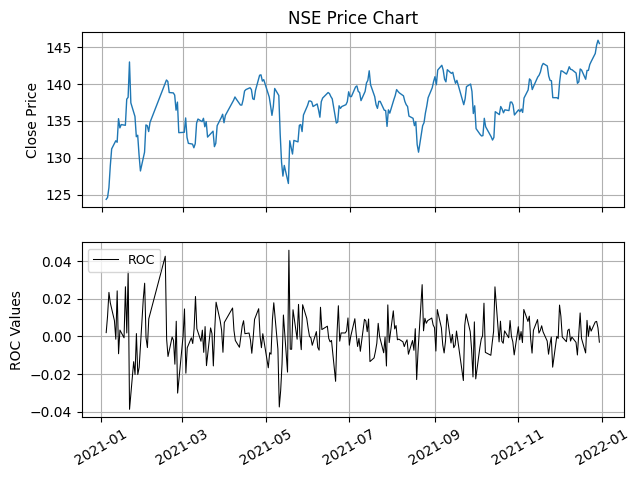

In [3]:

#import library modules
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import yfinance as yf

#Compute Roc
def ROC(data,n):
    N=data['Close'].diff(n)
    D=data['Close'].shift(n)
    ROC=pd.Series(N/D,name='Rate of Change')
    data=data.join(ROC)
    return data
date_0 = '2021-01-01'
date_1 = '2022-01-01'
data = yf.Ticker("0050.TW").history(start=date_0, end=date_1)
data=pd.DataFrame(data)

n=1
ROC_Nifty=ROC(data,n)
ROC=ROC_Nifty['Rate of Change']

#represent them in chart
fig=plt.figure(figsize=(7,5))
ax=fig.add_subplot(2,1,1)
ax.set_xticklabels([])
plt.plot(data['Close'],lw=1)
plt.title('NSE Price Chart')
plt.ylabel('Close Price')
plt.grid(True)
bx=fig.add_subplot(2,1,2)
plt.plot(ROC,'k',lw=0.75,linestyle='-',label='ROC')
plt.legend(loc=2,prop={'size':9})
plt.ylabel('ROC Values')
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(),rotation=30)
plt.show()

                  Open        High         Low       Close   Volume  \
Date                                                                  
2008-01-03   58.889999   58.889999   58.889999   58.889999        0   
2008-01-04   59.009998   59.009998   59.009998   59.009998        0   
2008-01-07   56.389999   56.389999   56.389999   56.389999        0   
2008-01-08   56.980000   56.980000   56.980000   56.980000        0   
2008-01-09   58.200001   58.200001   58.200001   58.200001        0   
...                ...         ...         ...         ...      ...   
2020-12-25  119.099998  119.599998  118.599998  118.949997  2801317   
2020-12-28  119.050003  120.000000  119.050003  120.000000  3407442   
2020-12-29  120.050003  120.199997  119.349998  119.900002  3093979   
2020-12-30  120.000000  121.599998  119.900002  121.599998  5368204   
2020-12-31  122.150002  122.400002  121.699997  122.250000  5741338   

            Dividends  Stock Splits  Rate of Change  
Date                  

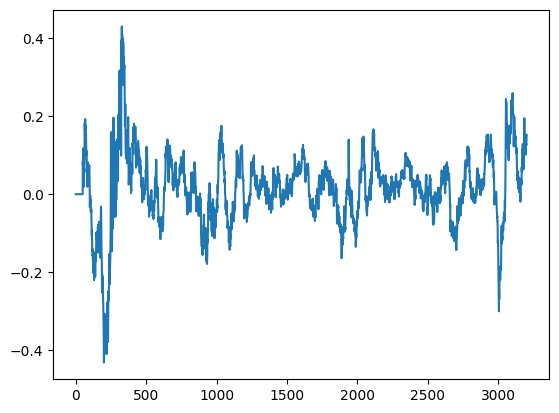

                  Open        High         Low       Close    Volume  \
Date                                                                   
2008-01-03   58.889999   58.889999   58.889999   58.889999         0   
2008-01-04   59.009998   59.009998   59.009998   59.009998         0   
2008-01-07   56.389999   56.389999   56.389999   56.389999         0   
2008-01-08   56.980000   56.980000   56.980000   56.980000         0   
2008-01-09   58.200001   58.200001   58.200001   58.200001         0   
...                ...         ...         ...         ...       ...   
2022-09-26  108.050003  108.050003  107.150002  107.650002  19920826   
2022-09-27  107.800003  107.949997  107.000000  107.500000   8962778   
2022-09-28  107.599998  107.650002  105.250000  105.250000  18898469   
2022-09-29  106.449997  106.449997  104.599998  104.900002  10402108   
2022-09-30  103.300003  103.900002  103.000000  103.449997  12676428   

            Dividends  Stock Splits  Rate of Change  
Date     

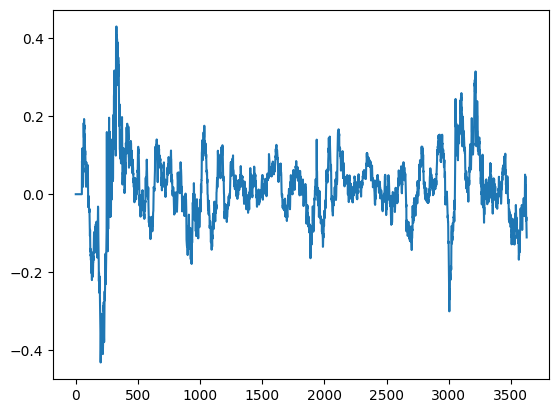

fequence :  0.00280986575085857
Period :  355.88888888888886 (Days)


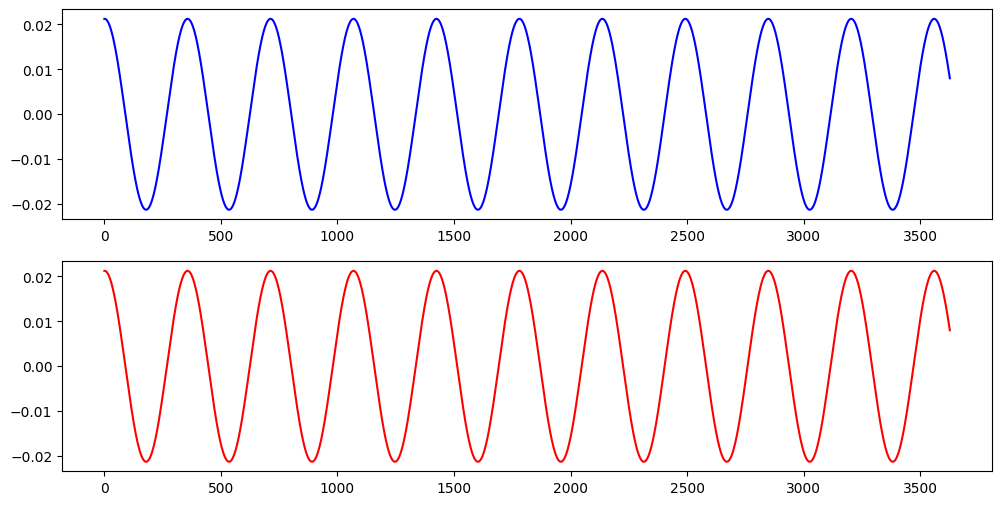

fequence :  0.002497658445207618
Period :  400.375 (Days)


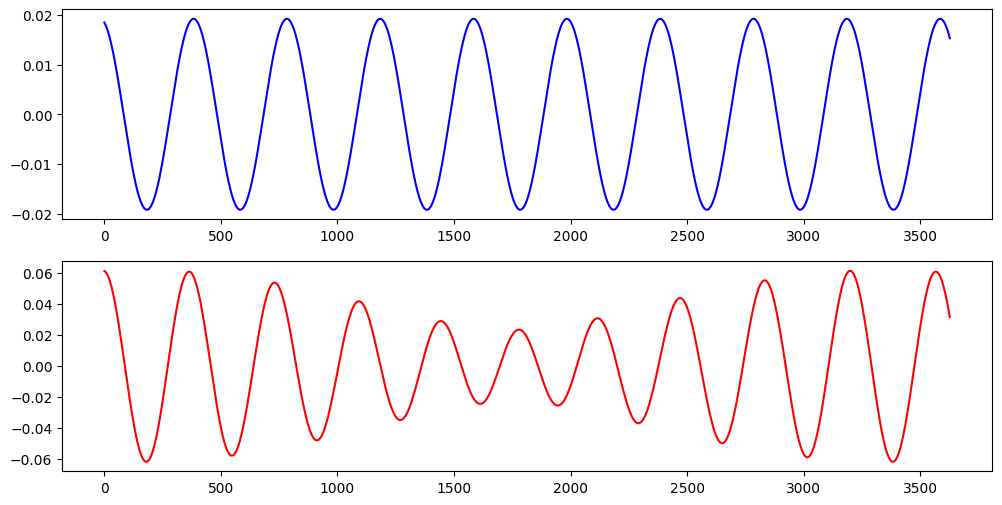

fequence :  0.0053075241960661886
Period :  188.41176470588232 (Days)


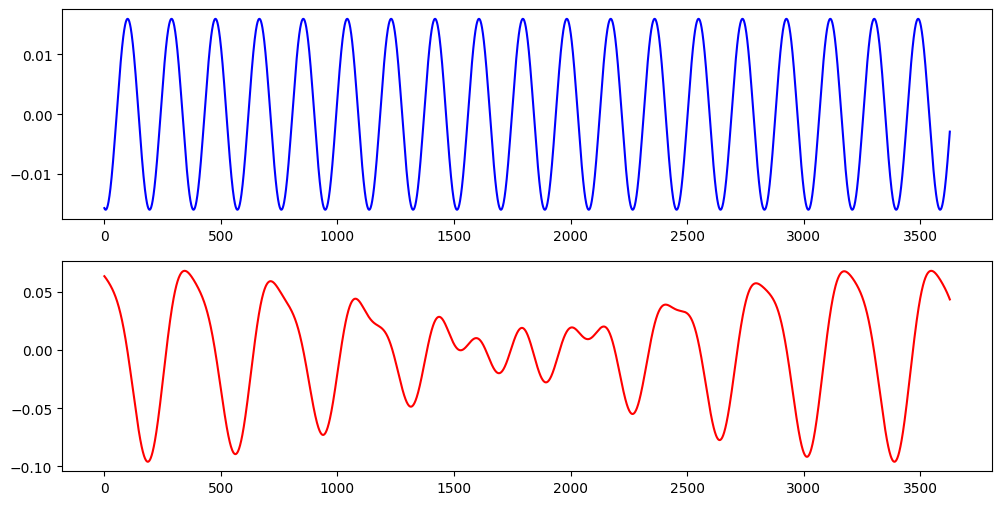

fequence :  0.001248829222603809
Period :  800.75 (Days)


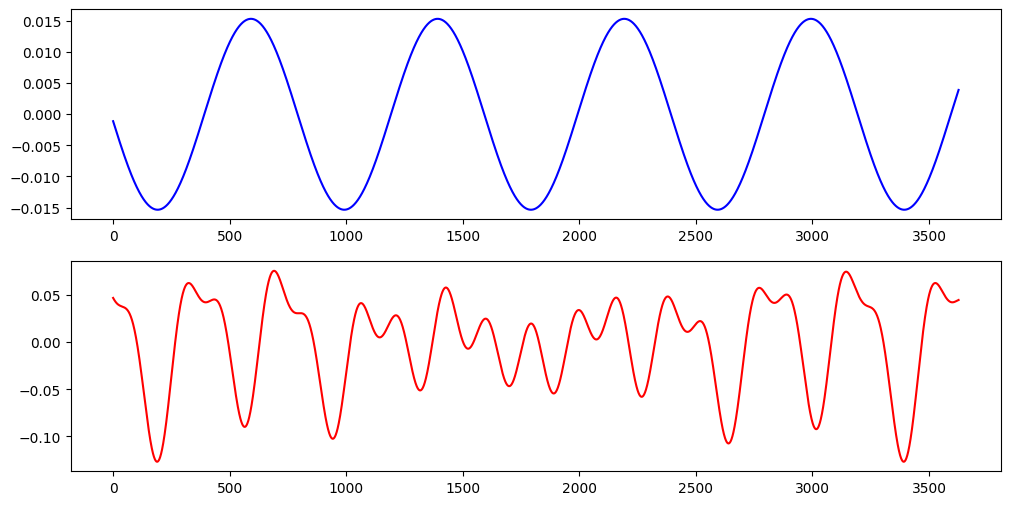

fequence :  0.00686856072432095
Period :  145.59090909090907 (Days)


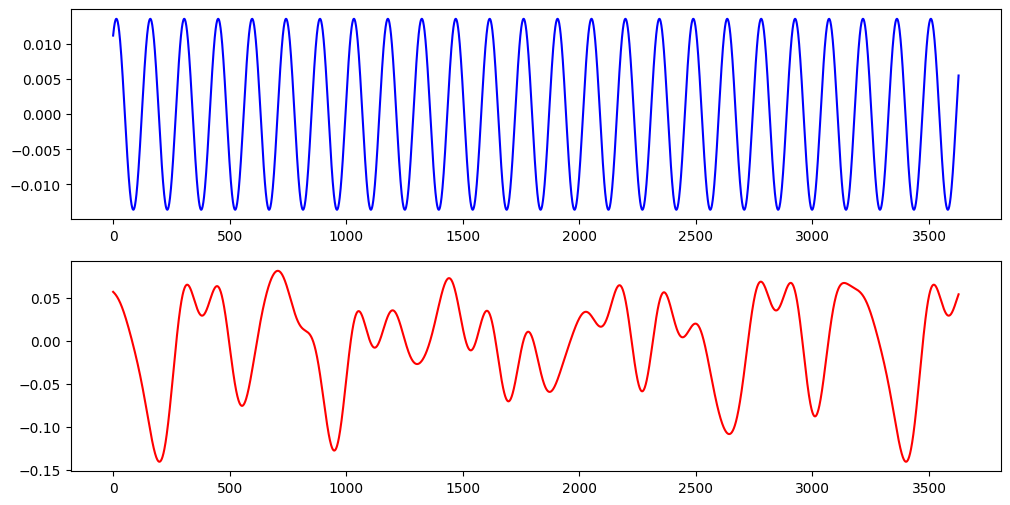

fequence :  0.002185451139556666
Period :  457.5714285714285 (Days)


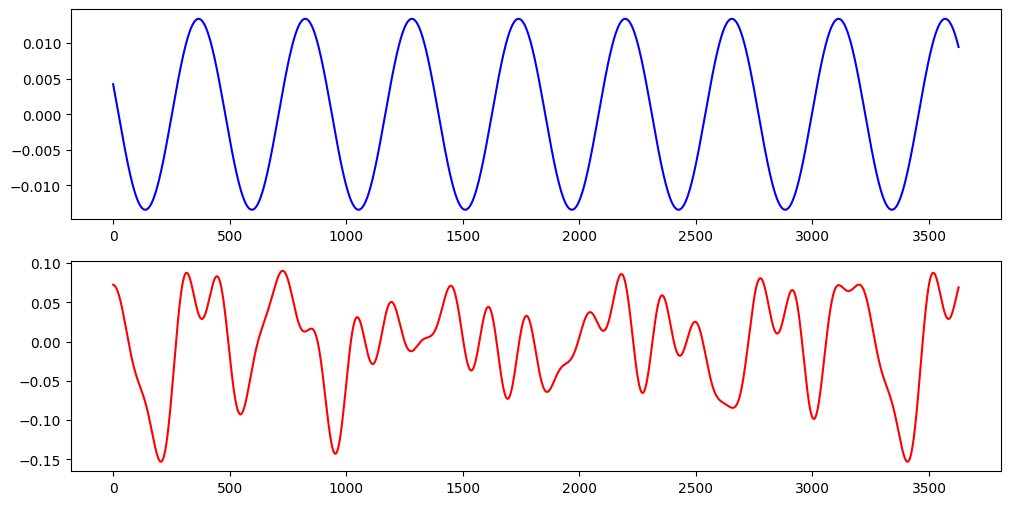

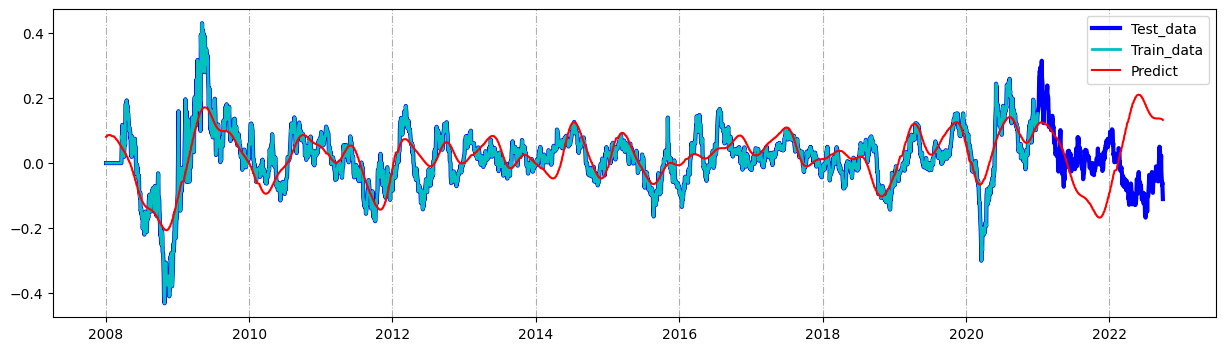

In [4]:
from signal import signal
import numpy as np
import pylab as pl
from numpy import fft
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

def ROC_(data,n):
    N=data['Close'].diff(n)
    D=data['Close'].shift(n)
    ROC=pd.Series(N/D,name='Rate of Change')
    data=data.join(ROC)
    data['Rate of Change'] = data['Rate of Change'].fillna(0)
    print(data)
    return data


def fourierExtrapolation(x, n_predict, n_harm):
    # fft process
    n = x.size
    n_harm = n_harm                 # number of harmonics in model
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n) 

    # set index
    indexes = list(range(n))                               # frequencies
    # indexes.sort(key = lambda i: np.absolute(f[i]))      # sort indexes by frequency, lower -> higher
    indexes.sort(key=lambda i: np.absolute(x_freqdom[i]))  # sort indexes by amplitudes, lower -> higher 
    indexes.reverse()                                      # sort indexes by amplitudes, higher -> lower 

    # restore signal
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    count = 0
    for i in indexes[:1 + n_harm * 2]:                         # 因frequence有負對稱
        ampli = np.absolute(x_freqdom[i]) / n                  # amplitude
        phase = np.angle(x_freqdom[i])                         # phase
        signal = ampli * np.cos(2 * np.pi * f[i] * t + phase)  # restore signal
        restored_sig += signal

        # draw signals
        if( count <= 10 and count % 2 ==0 ) :
            print('fequence : ' ,abs(f[i]))
            if (abs(f[i]) != 0):
                print('Period : ' ,1/abs(f[i]) ,'(Days)')
            fig, axes = plt.subplots(2, 1, figsize=(12, 6))
            axes[0].plot(signal, 'b',label = 'sig')
            axes[1].plot(restored_sig, 'r',label = 'restored_sig')
            plt.show()
        count += 1

    return restored_sig + p[0] * t

def main():
    # set train data period
    date_0 = '2008-01-03'
    date_1 = '2021-01-01'
    data = yf.Ticker("0050.TW").history(start=date_0, end=date_1)
    price = data['Close']

    data_ROC = yf.Ticker("0050.TW").history(start=date_0, end=date_1)
    data_ROC = pd.DataFrame(data_ROC)
    n=50
    ROC_Nifty=ROC_(data_ROC,n)
    ROC=ROC_Nifty['Rate of Change']
    x = np.array(ROC)
    pl.plot(x)
    pl.show()

    # set test data period
    date_2 = '2022-10-01'
    data2 = yf.Ticker("0050.TW").history(start=date_0, end=date_2)
    price2 = data2['Close']
    # x2 = np.array(price2)
    data_ROC_2 = pd.DataFrame(data2)
    n=50
    ROC_Nifty_2=ROC_(data_ROC_2,n)
    ROC_2=ROC_Nifty_2['Rate of Change']
    x2 = np.array(ROC_2)
    pl.plot(x2)
    pl.show()
 
    # set predict options
    n_predict = price2.size - price.size
    n_harm = 10 # number of haromnics in model
    extrapolation = fourierExtrapolation(x, n_predict, n_harm)
    
    # draw plot
    pl.plt.figure(figsize=(15,4))
    pl.plot(ROC_2.index, x2, 'b', linewidth = 3,label = 'Test_data')
    pl.plot(ROC.index, x, 'c', linewidth = 2, label = 'Train_data')
    # pl.plt.grid(axis='x',linestyle='-.')
    # pl.legend()
    # pl.show()
    # pl.plt.figure(figsize=(15,4))
    pl.plot(price2.index, extrapolation, 'r',label = 'Predict')
    pl.plt.grid(axis='x',linestyle='-.')
    pl.legend()
    pl.show()
    
if __name__ == "__main__":
    main()